In [52]:
import csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dF_stores=pd.read_csv('stores.csv')
dF_products=pd.read_csv('products.csv')
dF_customers=pd.read_csv('customers.csv')
dF_tickets=pd.read_csv('tickets.csv')

In [53]:
dF_tickets.head()

,ticketid,linenumber,customerid,cardtype,datekey,productid,quantity,extendedamount,originalamount,totaldiscount,itemdescription,storeid,storecity
0,10004503220190201744194,19,77340000013311992,DigitalCard,2019-02-01,853,1.0,1.29,1.29,0.0,AtÃºn claro natural,ES4503,Zaragoza
1,10004503520190201774912,13,77340000013409574,DigitalCard,2019-02-01,5704109,1.0,1.09,1.09,0.0,Agua mineral natur,ES4503,Zaragoza
2,1000450732019020114037,14,77340000011772214,DigitalCard,2019-02-01,201,1.0,0.99,0.99,0.0,CafÃ© nat molido,ES4507,Zaragoza
3,1000450762019020140789,43,77340000000542815,Mobile,2019-02-01,262,1.0,0.75,0.75,0.0,Chocolate fondant,ES4507,Zaragoza
4,10004504320190201330084,20,77340000013090638,Mobile,2019-02-01,37082,1.0,1.05,1.05,0.0,Yogur natural,ES4504,Zaragoza


In [57]:
from datetime import datetime

In [58]:
dF_tickets['datekey']=pd.to_datetime(dF_tickets['datekey'],format="%Y-%m-%d")

In [59]:
dF_tickets['week_number_of_year'] = dF_tickets['datekey'].dt.week


In [60]:
dF_tickets['week_number_of_year'].head()

0    5
1    5
2    5
3    5
4    5
Name: week_number_of_year, dtype: int64

In [61]:
dF_tickets['week_number_of_year'].value_counts()

11    115595
5     111065
12    109768
2     107342
9      98639
1      92754
8      82686
13     72067
10     62289
3      56522
6      32509
7      29608
4      29156
Name: week_number_of_year, dtype: int64

In [62]:
dF_week=dF_tickets.groupby(['customerid','week_number_of_year'])['extendedamount'].sum()

In [63]:
dF=pd.DataFrame(dF_week)
dF.head()

extendedamount
customerid        week_number_of_year                
77000000050003334 2                             33.14
                  5                             46.29
                  8                             69.53
77000000050010221 9                             33.30
77000000050012258 2                             39.24

In [70]:
dF_JR=dF.reset_index().pivot(index="customerid", columns="week_number_of_year", values="extendedamount").fillna(0)
dF_JR.head()

week_number_of_year,1,2,3,4,5,6,7,8,9,10,11,12,13
customerid,,,,,,,,,,,,,
77000000050003334,0.00,33.14,0.00,0.00,46.29,0.0,0.00,69.53,0.0,0.0,0.00,0.00,0.0
77000000050010221,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,33.3,0.0,0.00,0.00,0.0
77000000050012258,0.00,39.24,38.13,18.15,5.06,0.0,0.00,0.00,0.0,0.0,3.99,34.22,0.0
77000000050014586,0.00,0.00,0.00,2.37,13.63,0.0,0.00,0.00,22.7,0.0,5.90,15.19,0.0
77000000050014974,39.11,22.22,0.00,0.00,26.61,0.0,9.15,0.00,0.0,0.0,0.00,0.00,0.0


In [73]:
dF_JR["avg_compra"]=dF_JR.mean(axis=1)
dF_JR.head()

week_number_of_year,1,2,3,4,5,6,7,8,9,10,11,12,13,avg_compra
customerid,,,,,,,,,,,,,,
77000000050003334,0.00,33.14,0.00,0.00,46.29,0.0,0.00,69.53,0.0,0.0,0.00,0.00,0.0,11.458462
77000000050010221,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,33.3,0.0,0.00,0.00,0.0,2.561538
77000000050012258,0.00,39.24,38.13,18.15,5.06,0.0,0.00,0.00,0.0,0.0,3.99,34.22,0.0,10.676154
77000000050014586,0.00,0.00,0.00,2.37,13.63,0.0,0.00,0.00,22.7,0.0,5.90,15.19,0.0,4.599231
77000000050014974,39.11,22.22,0.00,0.00,26.61,0.0,9.15,0.00,0.0,0.0,0.00,0.00,0.0,7.468462


In [89]:
dF_JR["avg_compra"].mean()
dF_JR["avg_compra"].mode()

0    0.414615
dtype: float64

In [64]:
import matplotlib.pyplot as plt

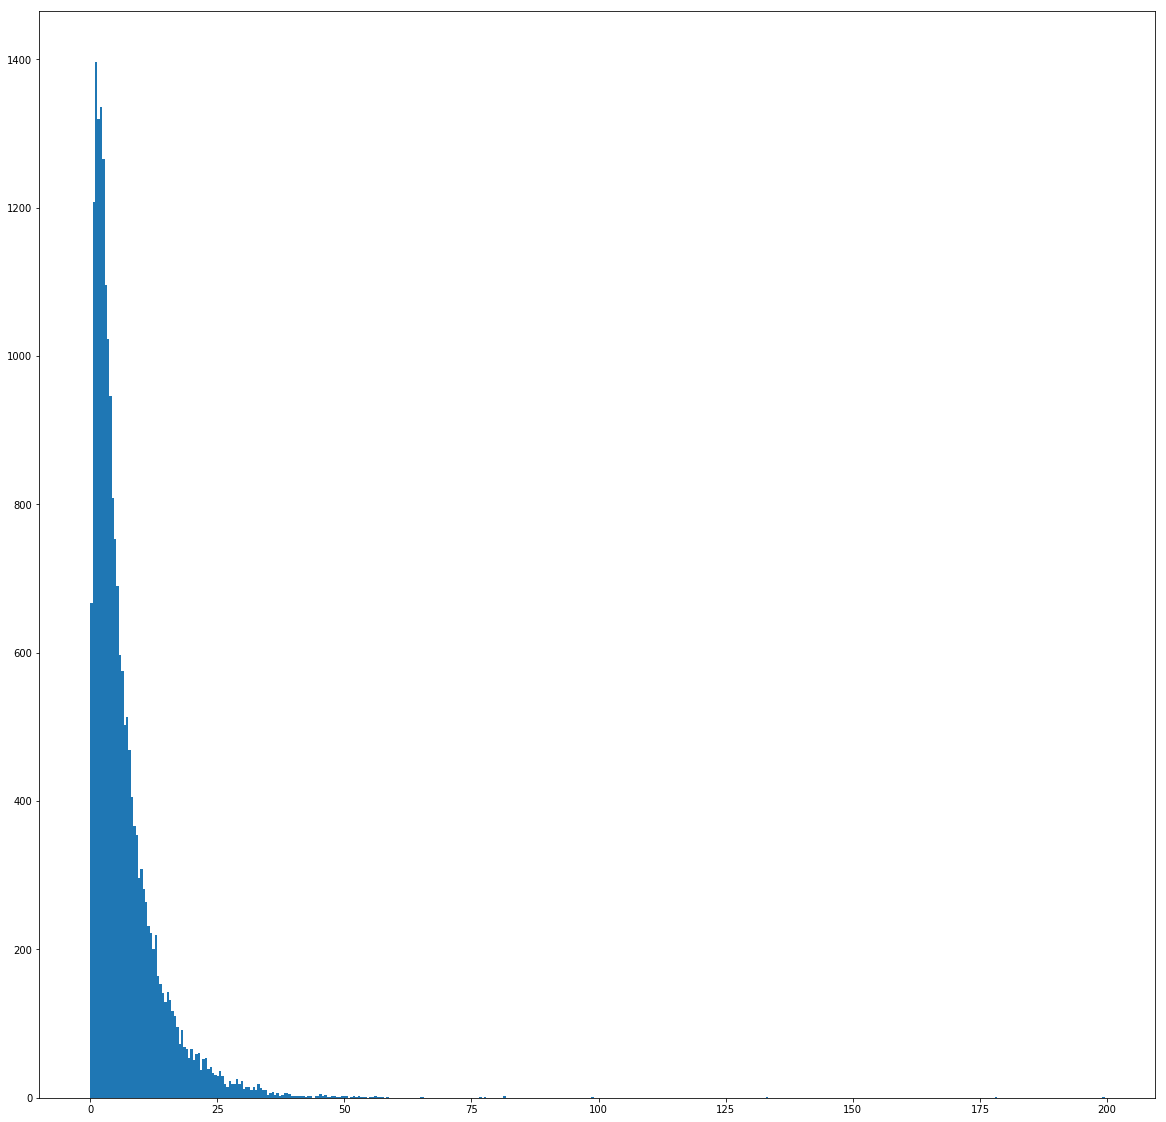

In [88]:
plt.rcParams['figure.figsize'] =[20, 20]


plt.hist(dF_JR["avg_compra"], bins='auto')

plt.show()

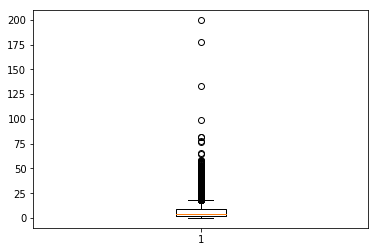

In [85]:
plt.boxplot(dF_JR["avg_compra"])

plt.show()

In [105]:
data=pd.DataFrame()
data['avg_compra'] = dF_JR['avg_compra']

data_Final = data.merge(dF_customers, on="customerid", how = 'inner')

data_Final.tail()

,customerid,avg_compra,isocountrycode,regularstoreid,registrationdate,unregistrationdate,gender,age,zipcode
19428,77340000025929558,1.208462,ES,ES4504,2017-11-25,NaN,NaN,NaN,NaN
19429,77340000025932274,0.880769,ES,ES0263,2017-11-25,NaN,NaN,NaN,NaN
19430,77340000025935281,0.988462,ES,ES0263,2017-11-25,NaN,F,46.0,50015
19431,77340000025935766,1.144615,ES,ES0428,2017-11-25,NaN,M,49.0,50009
19432,77340000025940422,1.880769,ES,ES0263,2017-11-25,NaN,F,39.0,50014


In [110]:
data_Final=data_Final.fillna(0)

In [111]:
plt.figure(figsize = (7, 7)) plt.scatter(data_Final[:, 1], data_Final.values[:, 7], c=cluster.labels_, cmap='rainbow')

SyntaxError: invalid syntax (<ipython-input-111-b7f2e91f6040>, line 1)

In [126]:
dataplotty = data_Final[['avg_compra', 'age']].copy()

In [116]:
dataplotty['avg_compra'] = dataplotty['avg_compra'] / dataplotty['avg_compra'].mean()

In [117]:
dataplotty['age'] = dataplotty['age'] / dataplotty['age'].mean()

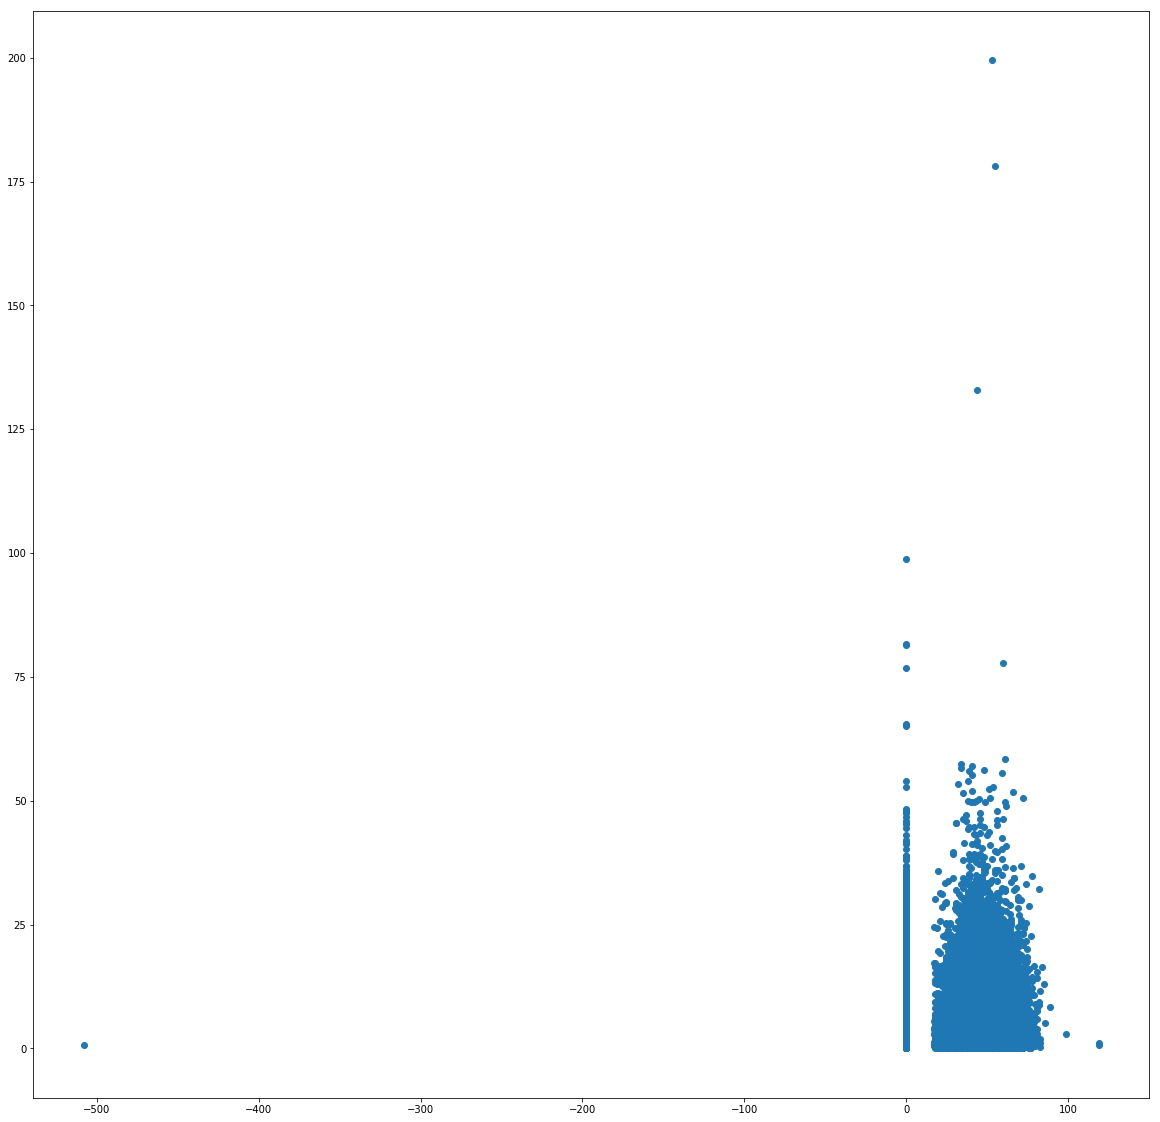

In [127]:
plt.scatter(dataplotty.values[:, 1], dataplotty.values[:, 0], cmap='rainbow')
plt.show()

In [123]:
dataplotty.values[:, 0]

array([1.69560515, 0.37905244, 1.57984049, ..., 0.14627099, 0.16937839,
       0.27831328])

In [134]:
data_Final.loc[data_Final.gender == "M", 'gender'] = 5
data_Final.loc[data_Final.gender == "F", 'gender'] = 4

In [137]:
gendy = data_Final[['avg_compra', 'gender']].copy()

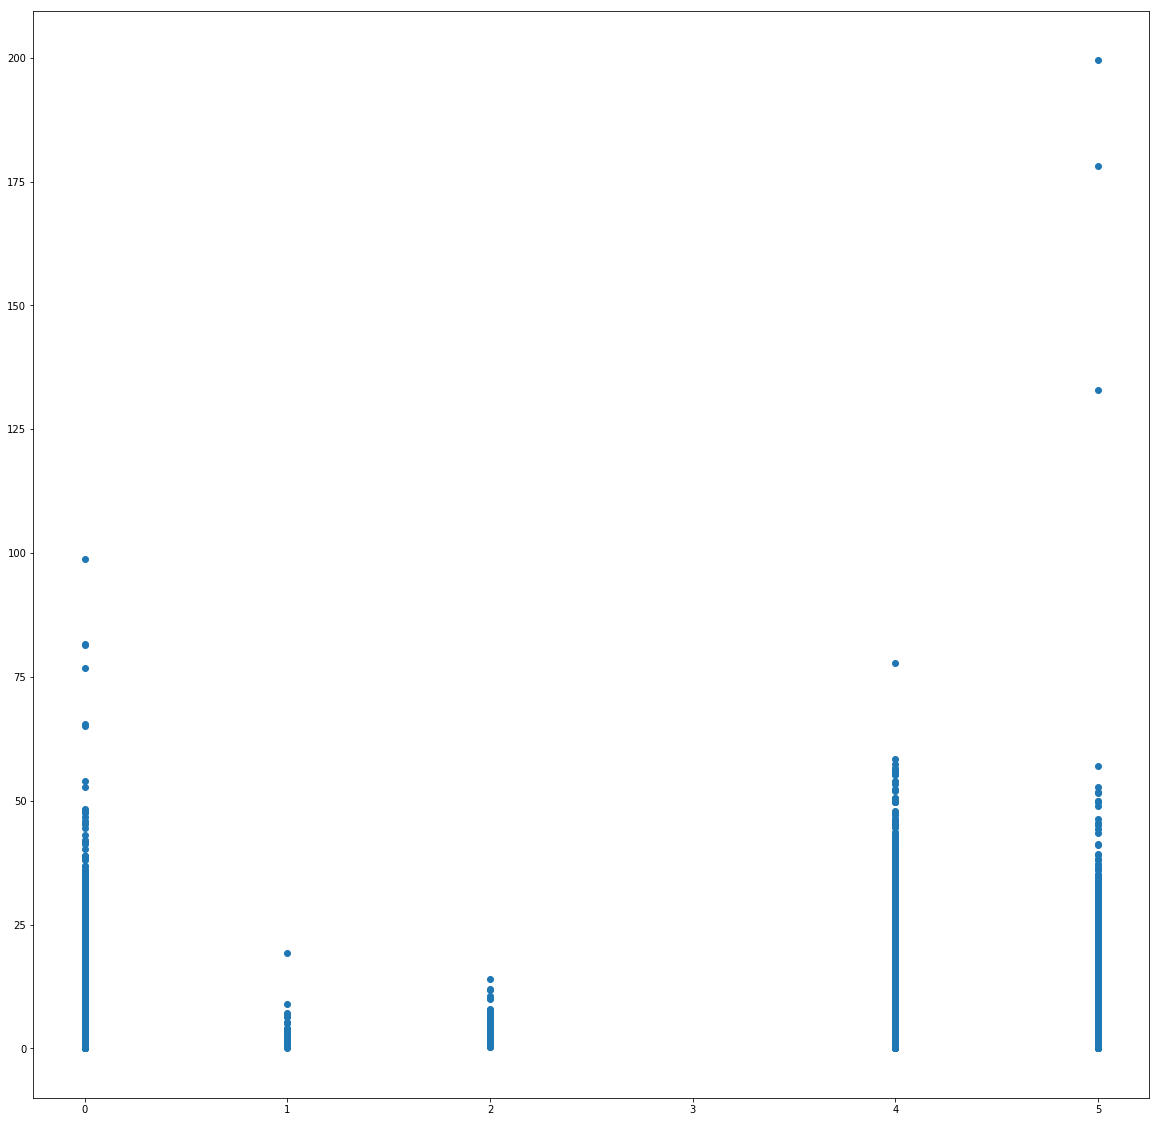

In [138]:
plt.scatter(gendy.values[:, 1], gendy.values[:, 0], cmap='rainbow')
plt.show()

In [141]:
dF_tickets["itemdescription"].value_counts()

Pan gallego                 6333
Fresas 500 g                6199
Barra de pan                5771
Yogur natural               5222
Baguette                    4992
Pechuga de pavo             4991
Huevos L suelo              4164
Chocolate negro             4118
Garbanzos precocin          3945
Leche semi                  3786
Banana                      3754
Delicias del mar            3421
Bolsa papel grande          3408
Yogur griego                3305
Leche entera                3276
Barra integral              3202
Yogur natural ecol          3163
Galletas cookies            2998
Huevos M suelo              2985
Aceituna anchoa s           2862
Chocolate c/leche           2840
Masa de hojaldre            2811
Tomate frito                2728
Plátano Canario FP          2718
Croissant margarina         2688
Galletas rel ch             2683
Vino tinto                  2540
Barra bocadillo             2521
Zanahoria                   2482
Palitos de mar              2452
          

In [144]:
dF_products.head()

,productid,merchandisegroup,merchandisesubgroup,isocountrycode,article,internationalarticlenumber,sectionname,familyname,categoryname,subcategoryname,merchandisefamily,weightproduct,scaleproduct,vatdescription,vatrate,agelimit,hwgdescription
0,1039,Surtido seco,Golosinas,ES,Orbit chicles sabores mentolados,NaN,ALIMENTACION SECA,"CHICLES, CARAMELO, GOLOSI",CHICLES,CHICLES,Otros productos dulces,False,True,Reducido,10.0,Keines,Pan/Bollería/Golosinas/OTC
1,3408,Surtido seco,Cosmetic,ES,Signal dentífrico,NaN,PERFUMERIA E HIGIENE,HIGIENE BUCAL,DENTIFRICOS,DENTIFRICOS,"Higiene bucal, afeitado",False,True,Ordinario,21.0,Keines,Surtido NF
2,8060,Surtido seco,Art. Limpieza,ES,Krafft Lavaparabrisas,NaN,ARTICULOS RESTO,ARTICULOS RESTO,ARTICULOS RESTO,ARTICULOS RESTO,Productos de limpieza y lavavajillas,False,False,Ordinario,21.0,Keines,Surtido NF
3,8602,Surtido seco,Cervezas / Derivados,ES,Benediktiner Cerveza de trigo sin a,NaN,NaN,NaN,NaN,NaN,"Cerveza, combinados de cerveza",False,False,Ordinario,21.0,18,Bebidas
4,5701449,Frischbrot / Hot Convenience,Bake off,ES,Mona de Pascua con frutas,5701449.0,PASTELERIA/BOLLERIA GRANEL,PASTELERIA/BOLLERIA GRANEL,PASTELERIA/BOLLERIA GRANEL,PASTELERIA/BOLLERIA GRANEL,Otros,False,False,Reducido,10.0,Keines,Pan/Bollería/Golosinas/OTC


In [148]:
dF_products["categoryname"].value_counts()

VERDURAS/HORTALIZAS             272
FRUTAS                          260
CERVEZA                         253
TINTO                           208
FIAMBRE Y EMBUTIDOS             162
SNACKS                           95
GALLET.DULCES                    91
CERDO                            85
BLANCO                           84
ARTICULOS  RESTO                 82
CHOCOLATINAS&SNACKS              81
REFRESCO CON GAS                 79
CHAMPU                           75
REST.PAST.BOLL.IND               74
PASTELERIA/BOLLERIA GRANEL       73
AVE                              72
PAN TOSTADO                      67
TABLETAS CHOCOLATE               66
PAN FRESCO                       64
RTO. QSO NATURAL                 59
FRUTOS SECOS                     52
GOLOSINAS                        49
AGUA                             47
TARRITOS/POUCH                   44
VACUNO                           44
GEL DE BANO Y DUCHA              43
DESODORANTES                     42
PATATAS FRITAS              

In [151]:
dF_products["familyname"].value_counts()

FRUTAS Y HORTALIZAS           531
TOTAL VINOS                   332
CERVEZA                       253
CARNE FRESCA                  202
CHOCOLATES Y CREMAS           189
CHARCUTERIA                   182
PROD.CORPORALES PERSO.        154
PATATAS Y SNACKS              137
PRODUCTOS CAPILARES           137
BEBIDAS REFRESCANTES          135
PANADERIA INDUSTRIAL          114
CHICLES, CARAMELO, GOLOSI     110
QUESO NATURAL                 101
GALLETAS(DULCE/SAL)            93
ARTICULOS  RESTO               82
PASTEL.BOLLER.IND.             81
PASTELERIA/BOLLERIA GRANEL     73
SOPAS,CALDOS,PURE,P            72
SALSAS                         70
T.ALIMENTOS INFANTILS          65
PAN FRESCO                     64
FRUTOS SECOS&DESHIDRAT.        60
CAFES/SUCEDANEOS               49
YOGUR&LECHE FER                48
AGUA                           47
ZUMOS,NECTAR,MOSTO             45
HIGIENE BUCAL                  41
QUESO FRESCO                   40
LECHE LIQUIDA                  36
PESCADOS Y MAR

In [150]:
dF_products["hwgdescription"].value_counts()

Pan/Bollería/Golosinas/OTC    1593
Bebidas                       1395
Surtido NF                    1226
F&V/Plantas y Flores          1088
Alimentación                   915
Fresco                         701
Conservas                      341
Pollo/Carne/Pescado            314
Congelados                     154
Name: hwgdescription, dtype: int64

In [152]:
dF_products["categoryname"].value_counts()

VERDURAS/HORTALIZAS             272
FRUTAS                          260
CERVEZA                         253
TINTO                           208
FIAMBRE Y EMBUTIDOS             162
SNACKS                           95
GALLET.DULCES                    91
CERDO                            85
BLANCO                           84
ARTICULOS  RESTO                 82
CHOCOLATINAS&SNACKS              81
REFRESCO CON GAS                 79
CHAMPU                           75
REST.PAST.BOLL.IND               74
PASTELERIA/BOLLERIA GRANEL       73
AVE                              72
PAN TOSTADO                      67
TABLETAS CHOCOLATE               66
PAN FRESCO                       64
RTO. QSO NATURAL                 59
FRUTOS SECOS                     52
GOLOSINAS                        49
AGUA                             47
TARRITOS/POUCH                   44
VACUNO                           44
GEL DE BANO Y DUCHA              43
DESODORANTES                     42
PATATAS FRITAS              